### Sihle_Riti_Classification_Hack

## 1. Introduction

South Africa is a multicultural society that is characterised by its rich linguistic diversity. Language is an indispensable tool that can be used to deepen democracy and also contribute to the social, cultural, intellectual, economic and political life of the South African society.

1. Introduction
2. Import libraries and load data
3. Data pre-processing
4. Exploratory Data Analysis

## 2: Import libraries and load data

In [205]:
# Standard
import pandas as pd
import numpy as np
import time
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Natural language Processing
import nltk
import string
import re
from sklearn.utils import resample
from nltk.stem import WordNetLemmatizer
#from nltk.corpus import stopwords
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer

# Models
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, KFold
from sklearn.linear_model import LogisticRegression, SGDClassifier, RidgeClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV, RepeatedStratifiedKFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.metrics import classification_report

# Performance
from sklearn.metrics import f1_score
from sklearn import metrics

# Exploratory Data Analysis
#from sklearn.feature_extraction.text import CountVectorizer
#from wordcloud import WordCloud, STOPWORDS

# Saving
#import pickle


In [206]:
# importing the dataset
train = pd.read_csv('train_set.csv')
test = pd.read_csv('test_set.csv')
sample_submission = pd.read_csv('sample_submission.csv')

In [207]:
train.head(11)
#test.head(11)

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...


In [208]:
test.head(11)

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.
5,6,"Ke feela dilense tše hlakilego, tša pono e tee..."
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused."


In [209]:
sample_submission.head()

,index,lang_id
0,1,tsn
1,2,nbl


# 3: Preprocessing

* Remove punctuations 


In [211]:
def clean_text(text):

    # change all words into lower case
    text = text.lower()

     #replace all url-links with url-web
    #url = r'http[s]?://(?:[A-Za-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9A-Fa-f][0-9A-Fa-f]))+'
    #web = 'url-web'
    #text = re.sub(url, web, text)

    # removing all punctuation and digits
    text = re.sub(r'[-]',' ',text)
    text = re.sub(r'[^\w\s]','',text)
    text = re.sub('[0-9]+', '', text)

    text = re.sub("â|ã", " ", text)  # removes strange character    
    text = re.sub("\\s+", " ", text)  # fills white spaces
    text = text.lstrip()  # removes whitespaces before string
    text = text.rstrip()  # removes whitespaces after string 
    
    # lemmatizing all words
   # text = text.lower()
   # lemmatizer = WordNetLemmatizer()
   # text = [lemmatizer.lemmatize(token) for token in text.split(" ")]
    #text = [lemmatizer.lemmatize(token, "v") for token in text]
    #text = " ".join(text)

    return text

In [213]:
#Apply the clean function to our train and test data
train['clean_text']=train['text'].apply(clean_text)
test['clean_text']=test['text'].apply(clean_text)

In [214]:
train.head(11)

,lang_id,text,clean_text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...,umgaqo siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...,i dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...,the province of kwazulu natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...,khomishini ya ndinganyiso ya mbeu yo ewa maana...
5,nso,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...,dinyakišišo tše tša go dirwa gabedi ka ngwaga ...
6,tsn,kgetse nngwe le nngwe e e sa faposiwang mo tsh...,kgetse nngwe le nngwe e e sa faposiwang mo tsh...
7,ven,mbadelo dze dza laelwa dzi do kwama mahatulele...,mbadelo dze dza laelwa dzi do kwama mahatulele...
8,nso,maloko a dikhuduthamaga a ikarabela mongwe le ...,maloko a dikhuduthamaga a ikarabela mongwe le ...
9,tsn,fa le dirisiwa lebone le tshwanetse go bontsha...,fa le dirisiwa lebone le tshwanetse go bontsha...


In [215]:
test.head(11)

,index,text,clean_text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele...",mmasepala fa maemo a a kgethegileng a letlelel...
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...,uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.,tshivhumbeo tshi fana na ngano dza vhathu
3,4,Kube inja nelikati betingevakala kutsi titsini...,kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.,winste op buitelandse valuta
5,6,"Ke feela dilense tše hlakilego, tša pono e tee...",ke feela dilense tše hlakilego tša pono e tee ...
6,7,<fn>(762010101403 AM) 1495 Final Gems Birthing...,fn am final gems birthing options_zulutxtfn
7,8,Ntjhafatso ya konteraka ya mosebetsi: Etsa bon...,ntjhafatso ya konteraka ya mosebetsi etsa bonn...
8,9,u-GEMS uhlinzeka ngezinzuzo zemithi yezifo ezi...,u gems uhlinzeka ngezinzuzo zemithi yezifo ezi...
9,10,"So, on occasion, are statistics misused.",so on occasion are statistics misused


In [216]:
#Count of data entries for different sentiments
train.lang_id.value_counts()

nbl    3000
ven    3000
eng    3000
xho    3000
tso    3000
afr    3000
ssw    3000
nso    3000
zul    3000
sot    3000
tsn    3000
Name: lang_id, dtype: int64

In [217]:
X = train['text']
y = train['lang_id'] 


X_train , X_test , y_train , y_test = train_test_split(X , y, test_size =0.05)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.10)

In [218]:
%%time
classifiers = [
               LinearSVC(random_state=42),
               ExtraTreesClassifier(),
               LogisticRegression(random_state=42, n_jobs=1, max_iter=5000),
               SGDClassifier(),
               AdaBoostClassifier(),
               KNeighborsClassifier(),
               MultinomialNB(),
               RidgeClassifier(),
               RandomForestClassifier()
    ]


Wall time: 2.77 s


In [219]:
%%time
def models(classifiers, X_train, y_train, X_test, y_test):
    
    model_summary = {}
    
   
    # Pipeline to balance the classses and then to build the model
    for clf in classifiers:
        clf_text = Pipeline([('tfidf', TfidfVectorizer(min_df=1,
                                                       max_df=0.9,
                                                       ngram_range=(1, 2))),
                             ('clf', clf)])

        # Logging the Execution Time for each model
        start_time = time.time()
        clf_text.fit(X_train, y_train)
        predictions = clf_text.predict(X_test)
        run_time = time.time()-start_time

        # Output for each model
        models_summary[clf.__class__.__name__] = {
            'F1-Macro': metrics.f1_score(y_test,
                                         predictions,
                                         average='macro'),
            'F1-Accuracy': metrics.f1_score(y_test, predictions,
                                            average='micro'),
            'F1-Weighted': metrics.f1_score(y_test,
                                            predictions,
                                            average='weighted'),
            'Execution Time': run_time}

    return pd.DataFrame.from_dict(models_summary, orient='index')

Wall time: 0 ns
Compiler : 177 ms
Parser   : 411 ms


In [ ]:
%%time
classifiers_df = models_building(classifiers, X_train, y_train, X_test, y_test)
class_df = classifiers_df.sort_values('F1-Macro', ascending=False)
class_df

Wall time: 1.79 s


<AxesSubplot:>

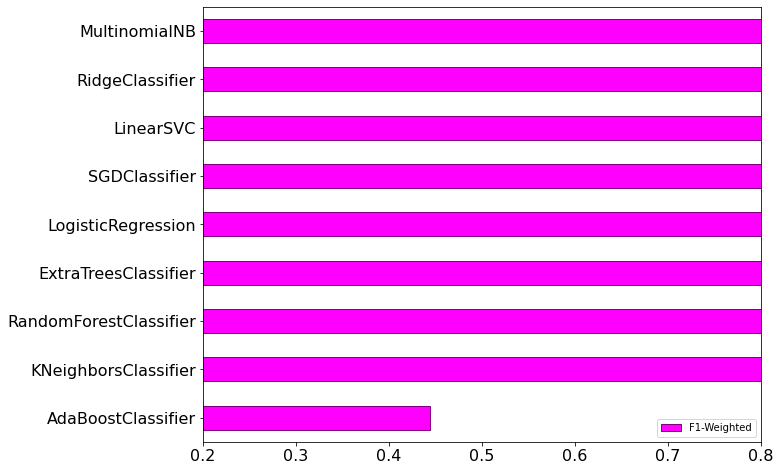

In [198]:
%%time
the_clf_df.sort_values('F1-Weighted',ascending=True).plot(y='F1-Weighted', 
                                                            kind='barh', 
                                                            xlim=[0.2, 0.8], 
                                                            color= 'magenta', 
                                                            edgecolor = 'purple',
                                                            figsize=(10, 8), 
                                                            fontsize=16)

In [203]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.02)

In [204]:
# Creating a pipeline for the gridsearch
param_grid = {'alpha': [0.1, 1, 5, 10]}  # setting parameter grid

Multi = Pipeline([('tfidf', TfidfVectorizer(min_df=2,
                                                max_df=0.9,
                                                ngram_range=(1, 2))),
                      ('mnb', GridSearchCV(MultinomialNB(),
                                           param_grid=param_grid,
                                           cv=5,
                                           n_jobs=-1,
                                           scoring='f1_weighted'))
                      ])

Multi_NB.fit(X_train, y_train)  # Fitting the model

y_pred_Multi = Multi_NB.predict(X_test)  # predicting the fit on validation set


print(classification_report(y_test, y_pred_Multi))

              precision    recall  f1-score   support

         afr       1.00      1.00      1.00        47
         eng       1.00      1.00      1.00        53
         nbl       1.00      1.00      1.00        63
         nso       1.00      1.00      1.00        51
         sot       1.00      1.00      1.00        64
         ssw       1.00      1.00      1.00        68
         tsn       1.00      1.00      1.00        57
         tso       1.00      1.00      1.00        56
         ven       1.00      1.00      1.00        62
         xho       1.00      1.00      1.00        73
         zul       1.00      1.00      1.00        66

    accuracy                           1.00       660
   macro avg       1.00      1.00      1.00       660
weighted avg       1.00      1.00      1.00       660



In [196]:
multi_df = pd.DataFrame(test['index'])
multi_df['lang_id'] = Multi_NB.predict(test['text'])
multi_df.to_csv('MultinomialB.csv', index=False)